# Monte Carlo Simulation

몬테카를로 방법(Monte Carlo method)은 난수를 이용하여 함수의 값을 확률적으로 계산하는 알고리즘을 부르는 용어입니다. 수학이나 물리학 등에 자주 사용되며, 계산하려는 값이 closed form으로 표현되지 않거나 복잡한 경우에 근사적으로 계산할 때 사용 됩니다.

간단히 말하면 큰 수의 법칙을 이용하여 실제 발생한 결과를 이용하여 확률적으로 추론하는 것입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(0, 1, 0.001)
np.append(x, 1)
y = np.sqrt(1 - x**2)

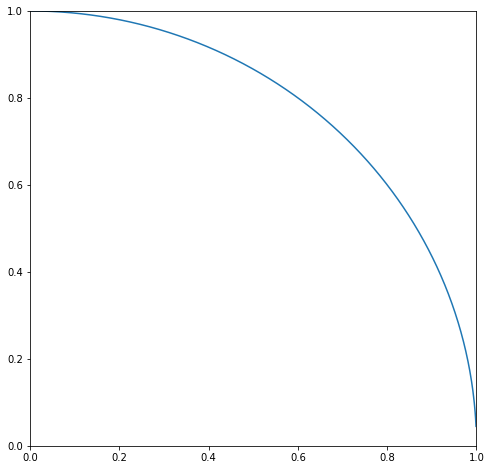

In [3]:
fig = plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

위의 그래프에서 원의 방정식은 $x^{2} + y^{2} = 1$ 입니다. 하지만 방정식을 모르는 상태라면 호 내부의 면적을 구할 수 없을 것입니다. 위의 호의 내부 면적은 $\frac{1}{4}\Pi r^{2} = 0.25 * 3.14 * 1 = 0.785$ 로 근사합니다. 그러면 많은 Random Trial을 통하여  위 면적에 Random Point들을 표시해 보고 $\frac{호 내부 면적의 점의 갯수}{전체 점의 갯수}$를 통하여 호의 넓이를 구해보겠습니다.

- Random 값의 갯수 : 백만개
- 호 내부의 점은 파란색, 호 외부의 점은 빨간색으로 표시
- 호 내부의 점 갯수, 외부의 점 갯수 및 확률적 넓이 구하기

In [4]:
rand = np.random.uniform(0, 1, size= (1000000, 2))
# x^2 + y^2 적용
arc_form = np.sum(rand**2, axis=1)

In [5]:
rand_x = rand[:,0]
rand_y = rand[:,1]
inner_arc_idx = np.where(arc_form <= 1)[0]
outer_arc_idx = np.where(arc_form > 1)[0]

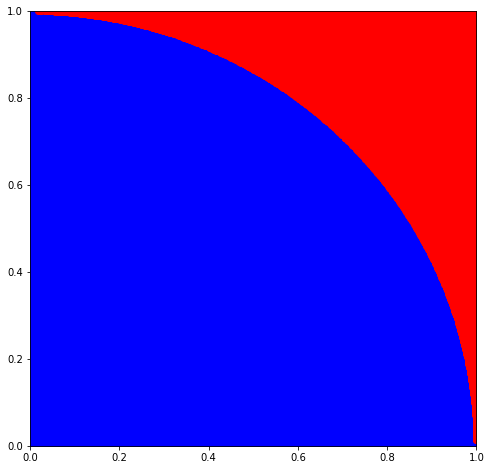

In [6]:
fig = plt.figure(figsize=(8, 8))
plt.plot(rand_x[inner_arc_idx], rand_y[inner_arc_idx], 'bo')
plt.plot(rand_x[outer_arc_idx], rand_y[outer_arc_idx], 'ro')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [7]:
print("#inner arc point : ", len(inner_arc_idx))
print("#outer arc point : ", len(outer_arc_idx))
print("area : ", len(inner_arc_idx) / 1000000)

#inner arc point :  784672
#outer arc point :  215328
area :  0.784672


공식을 통한 계산과 시뮬레이션을 통한 추론의 결과는 유사합니다. (둘 다 0.785)